In [1]:
import numpy as np

In [2]:
class Linear_Regression():

  # initiating the parameters (learning rate & no. of iterations)
  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations


  def fit(self, X, Y ):

    # number of training examples & number of features

    self.m, self.n = X.shape  # number of rows & columns

    # initiating the weight and bias 

    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    # implementing Gradient Descent
    
    for i in range(self.no_of_iterations):
      self.update_weights()


  def update_weights(self):

    Y_prediction = self.predict(self.X)

    # calculate gradients

    dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m

    db = - 2 * np.sum(self.Y - Y_prediction)/self.m

    # upadating the weights
    
    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db
 

  def predict(self, X):

    return X.dot(self.w) + self.b

### Using Linear Regression model for Prediction

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


#### Data preprocessing

In [4]:
salary_data = pd.read_csv('/Users/chizurumokereolujie/Documents/AI RELATED/MACHINE LEARNING CLASS/Datasets/salary_data.csv')

In [5]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [6]:
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [7]:
salary_data.shape

(30, 2)

In [8]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [9]:
X = salary_data.iloc[:, :-1]
Y = salary_data.iloc[:,1]

In [10]:
print(X)

    YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5


In [11]:
print(Y)

0      39343
1      46205
2      37731
3      43525
4      39891
5      56642
6      60150
7      54445
8      64445
9      57189
10     63218
11     55794
12     56957
13     57081
14     61111
15     67938
16     66029
17     83088
18     81363
19     93940
20     91738
21     98273
22    101302
23    113812
24    109431
25    105582
26    116969
27    112635
28    122391
29    121872
Name: Salary, dtype: int64


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=2)

In [13]:
print(Y_train.shape)

(20,)


### Training the Linear Regression model

In [14]:
model = Linear_Regression(learning_rate=0.02, no_of_iterations=1000)

In [15]:
model.fit(X_train, Y_train)

In [16]:
print('weight = ', model.w[0])
print('bias = ', model.b)

weight =  9514.400999035135
bias =  23697.406507136307


/var/folders/rh/y3hn0nvs0b1_vl1psgk9ss400000gn/T/ipykernel_4071/1888015297.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('weight = ', model.w[0])


In [17]:
test_data_prediction = model.predict(X_test)

In [18]:
print(test_data_prediction)

1      36066.127806
0      34163.247606
14     66512.211003
9      58900.690204
21     91249.653600
19     80783.812501
23    101715.494699
6      52240.609504
3      42726.208505
20     88395.333301
dtype: float64


#### Visualizing the predicted values & actual values

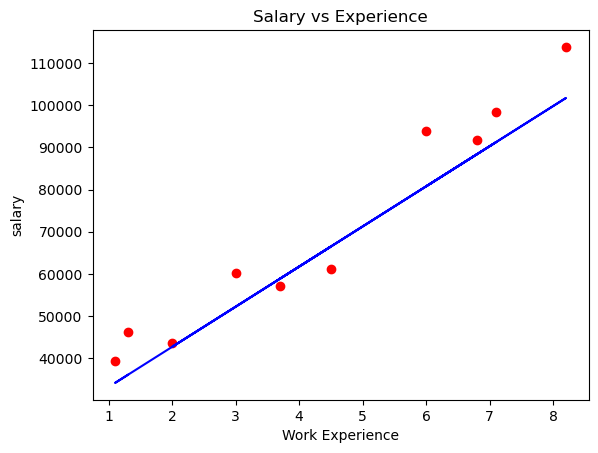

In [19]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, test_data_prediction, color = 'blue')
plt.xlabel('Work Experience')
plt.ylabel('salary')
plt.title('Salary vs Experience')
plt.show()